Netflix Recommendation System

This project builds a Content-Based Recommendation System using the Netflix Titles dataset.
It uses TF-IDF Vectorization and Cosine Similarity to find and recommend similar shows/movies.

 Features:
	•	Recommends similar titles based on title, director, cast, genre, and description
	•	Allows users to enter a title and get 5 similar recommendations
	•	Provides a basic popularity-based genre filter
	•	Includes an interactive mini GUI using ipywidgets inside Jupyter Notebook

 Technologies Used:
	•	Python, Pandas, Scikit-learn
	•	TF-IDF Vectorizer, Cosine Similarity
	•	IPyWidgets for interaction

Developed as part of Machine Learning & Data Science learning journey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("//Users//vipinsaini//Downloads//netflix_titles.csv")
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#inspection of data=>
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: title={'center': 'Content Type Distribution'}, xlabel='type'>

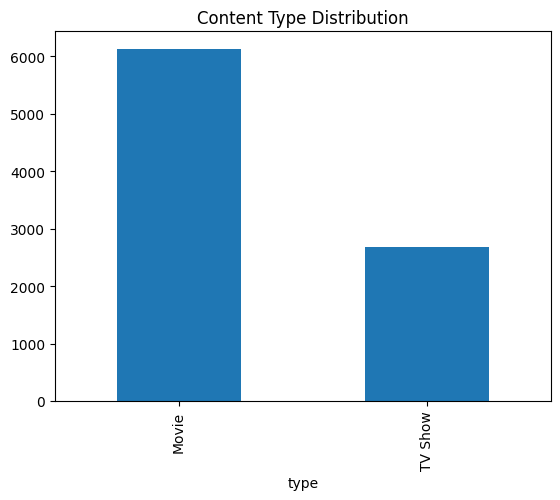

In [5]:
#count the movies vs tv shows
dataset['type'].value_counts().plot(kind='bar', title='Content Type Distribution')

<Axes: title={'center': 'Top 10 Content Producing Countries'}, xlabel='country'>

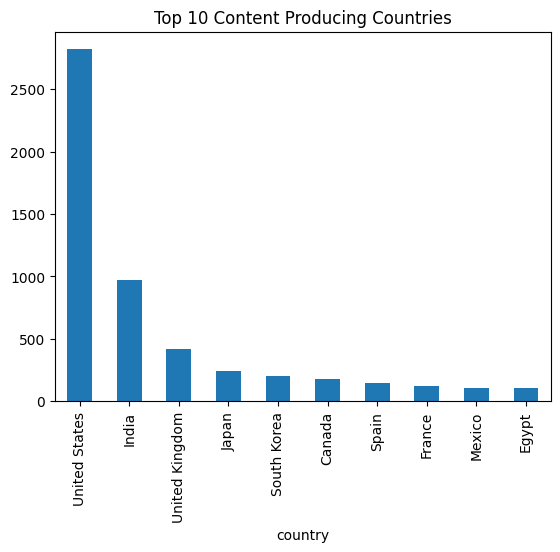

In [6]:
#top  10 countries producing content
dataset['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Content Producing Countries')

most common genere 

<Axes: title={'center': 'Top 10 Genres'}, xlabel='Genre'>

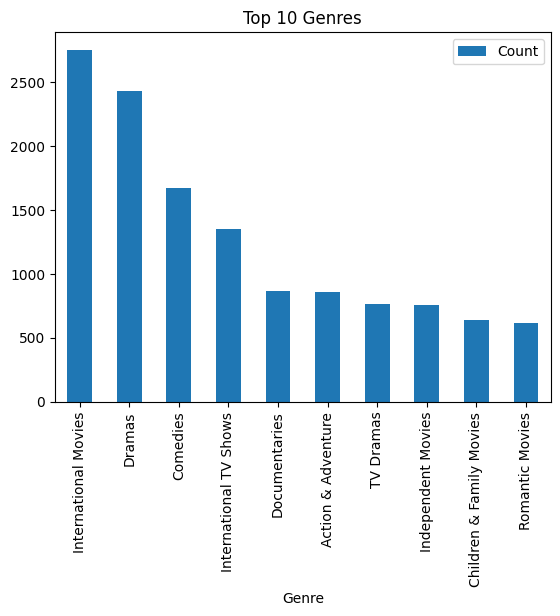

In [7]:
from collections import Counter

genres = dataset['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter([genre for sublist in genres for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
top_genres.set_index('Genre').plot(kind='bar', title='Top 10 Genres')

<Axes: title={'center': 'Top 10 Directors'}, ylabel='director'>

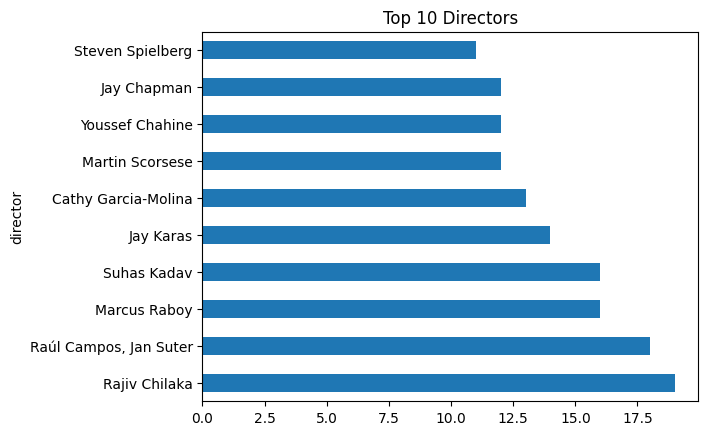

In [8]:
 # most frequent directors
dataset['director'].value_counts().head(10).plot(kind='barh', title='Top 10 Directors')

In [9]:
#loved content
dataset.groupby('country')['title'].count().sort_values(ascending=False).head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: title, dtype: int64

In [10]:
# Impute missing 'director' and 'cast' values with 'Unknown'
dataset['director'].fillna('no', inplace=True)
dataset['cast'].fillna('no', inplace=True)

# Impute missing 'country' values with 'Unknown'
dataset['country'].fillna('no', inplace=True)

# For 'date_added' and 'rating', you might need to inspect them further
# For example, if 'date_added' has few missing values, you could drop those rows or use forward/backward fill if time-series order is relevant.
# For 'rating', you could impute with the mode or 'Unknown' if a recommendation system might not be dependent on it.

/var/folders/60/ccwmrffx5p50jsx9kjg08tdw0000gn/T/ipykernel_8580/3813700861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['director'].fillna('no', inplace=True)
/var/folders/60/ccwmrffx5p50jsx9kjg08tdw0000gn/T/ipykernel_8580/3813700861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Date Added Trend Analysis:

Convert the date_added column to a datetime format.
Analyze the trend of content added to Netflix over the years and months. This can reveal growth patterns, content acquisition strategies, or periods of significant content additions.
Visualization: A line plot showing the number of titles added per year or month.

Number of unparseable dates after conversion: 10


/var/folders/60/ccwmrffx5p50jsx9kjg08tdw0000gn/T/ipykernel_8580/2182058686.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset.dropna(subset=['year_added']), x='year_added',


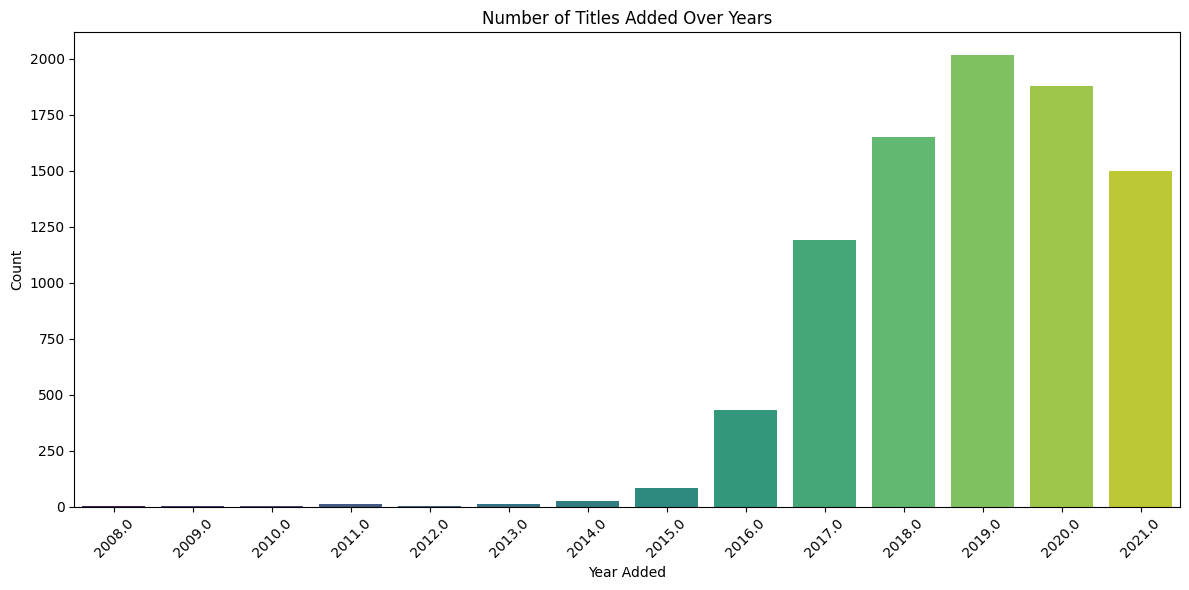

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous steps.
# If you are using 'dataset' in your notebook, please replace 'df' with 'dataset'.
# I will use 'df' as per our previous conversations, but be mindful of your variable name.

# --- Step 1: Clean potential whitespace issues ---
# Remove leading/trailing whitespace from the 'date_added' column
dataset['date_added'] = dataset['date_added'].str.strip()

# --- Step 2: Convert to datetime, handling potential errors and mixed formats ---
# Using errors='coerce' will turn any parsing errors into NaT (Not a Time)
# Using format='mixed' allows pandas to infer the format for each date string
dataset['date_added'] = pd.to_datetime(dataset['date_added'], errors='coerce', format='mixed')

# Check how many NaT values are created after conversion (these were the problematic ones)
print(f"Number of unparseable dates after conversion: {dataset['date_added'].isnull().sum()}")

# --- Step 3: Extract year and month (this will work fine now) ---
dataset['year_added'] = dataset['date_added'].dt.year
dataset['month_added'] = dataset['date_added'].dt.month_name()

# --- Step 4: Plotting the number of titles added over years ---
plt.figure(figsize=(12, 6))
# Filter out NaN values from 'year_added' before plotting, as they represent unparseable dates
sns.countplot(data=dataset.dropna(subset=['year_added']), x='year_added',
              order=dataset['year_added'].value_counts().index.sort_values(), palette='viridis')
plt.title('Number of Titles Added Over Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

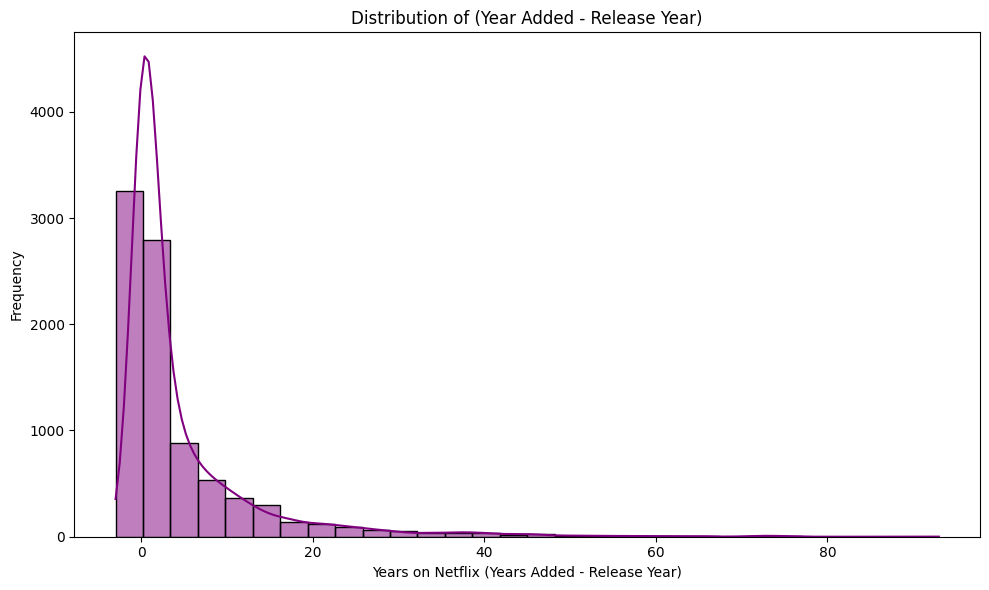

In [12]:
#Release Year vs. Added Date Relationship:

#Explore the time difference between release_year and date_added. This can tell you if Netflix is adding more new releases or older catalog content.
#Visualization: A scatter plot or a histogram of year_added - release_year.
dataset['years_on_netflix'] = dataset['year_added'] - dataset['release_year']

plt.figure(figsize=(10, 6))
sns.histplot(dataset['years_on_netflix'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of (Year Added - Release Year)')
plt.xlabel('Years on Netflix (Years Added - Release Year)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Content Rating Distribution:

You have the rating column. Analyze the distribution of different content ratings (e.g., 'TV-MA', 'PG-13', 'R', etc.). This can indicate the general audience Netflix caters to or the maturity level of its content.
Visualization: A count plot of the rating column.

/var/folders/60/ccwmrffx5p50jsx9kjg08tdw0000gn/T/ipykernel_8580/518065303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='rating', order=dataset['rating'].value_counts().index, palette='magma')


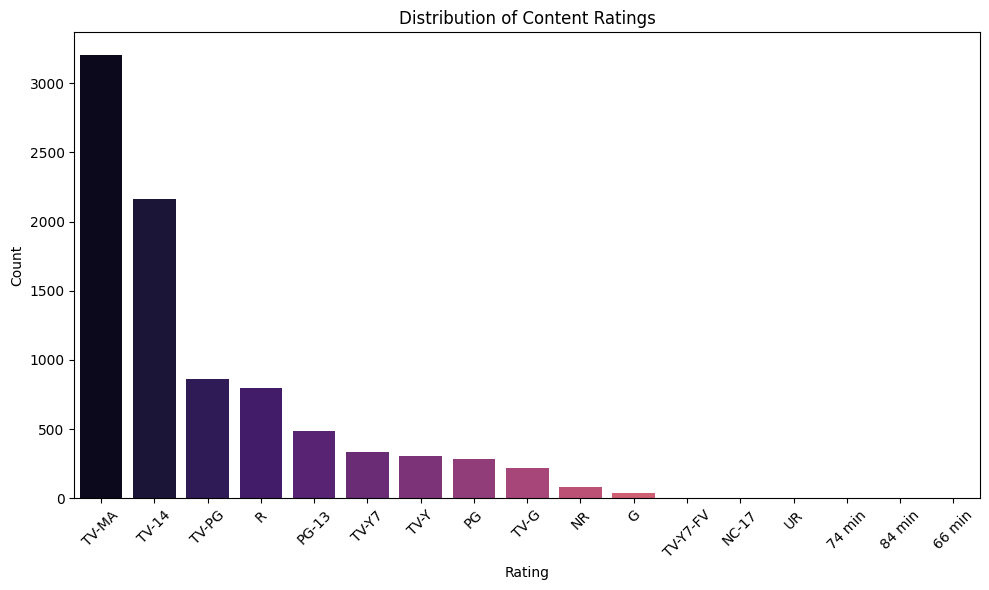

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='rating', order=dataset['rating'].value_counts().index, palette='magma')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top N Cast Members Analysis:

Similar to how you analyzed directors and genres, extracting and counting individual cast members can identify the most frequently appearing actors/actresses.
Visualization: A horizontal bar plot of the top N cast members

/var/folders/60/ccwmrffx5p50jsx9kjg08tdw0000gn/T/ipykernel_8580/1818187254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['cast'].fillna('Unknown', inplace=True)
/var/folders/60/ccwmrffx5p50jsx9kjg08tdw0000gn/T/ipykernel_8580/1818187254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cast, y='Cast Member', x='Count', palette='viridis')


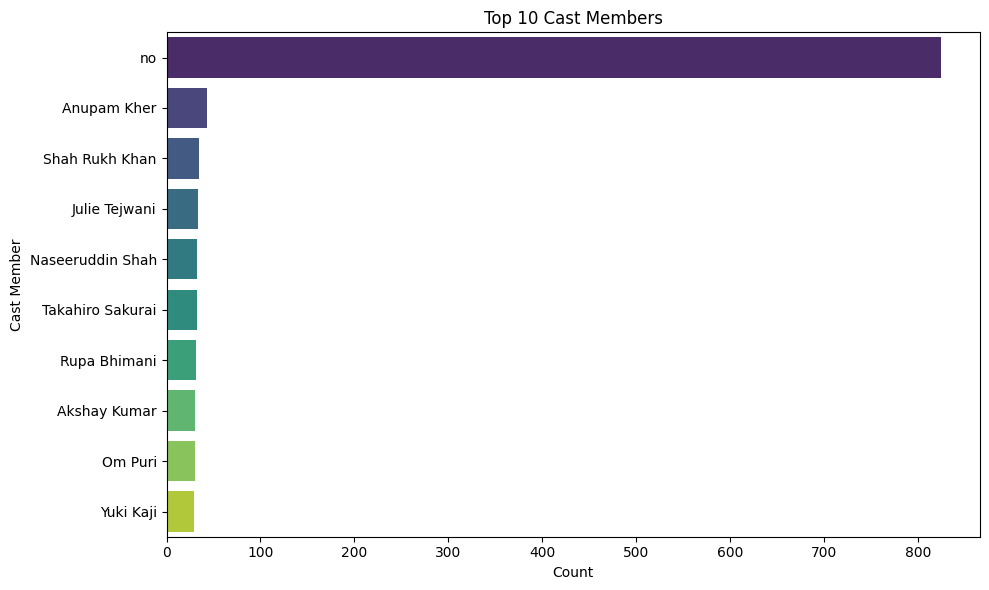

In [14]:
from collections import Counter

# Ensure 'cast' column is filled (e.g., with 'Unknown' as suggested in step 1)
dataset['cast'].fillna('Unknown', inplace=True)

all_cast = dataset['cast'].apply(lambda x: x.split(', '))
cast_counts = Counter([actor.strip() for sublist in all_cast for actor in sublist if actor.strip() != 'Unknown'])
top_cast = pd.DataFrame(cast_counts.most_common(10), columns=['Cast Member', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cast, y='Cast Member', x='Count', palette='viridis')
plt.title('Top 10 Cast Members')
plt.xlabel('Count')
plt.ylabel('Cast Member')
plt.tight_layout()
plt.show()

Content by Country and Type (Stacked Bar Chart):

You've analyzed top countries and content types separately. Combining these insights can show which countries produce more movies versus TV shows.
Visualization: A stacked bar chart showing the number of Movies and TV Shows for the top N countries.

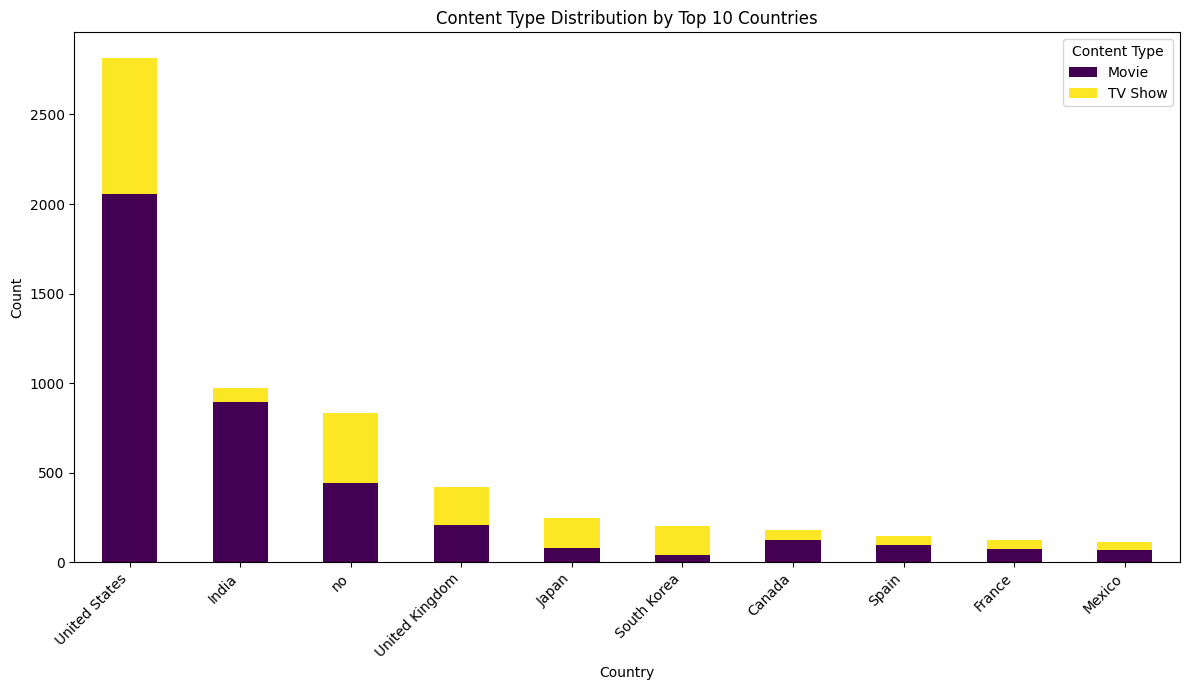

In [15]:
country_type_counts = dataset.groupby(['country', 'type']).size().unstack(fill_value=0)
top_countries_by_total = dataset['country'].value_counts().head(10).index
country_type_counts_top = country_type_counts.loc[top_countries_by_total]

country_type_counts_top.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Content Type Distribution by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

Relationship between Rating and Duration (for Movies):

Investigate if there's any correlation or pattern between the content rating and the duration of movies. Are higher-rated movies generally longer or shorter?
Visualization: Box plots of movie duration_int grouped by rating.

/var/folders/60/ccwmrffx5p50jsx9kjg08tdw0000gn/T/ipykernel_8580/15479076.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movies_df.dropna(subset=['duration_int', 'rating']),


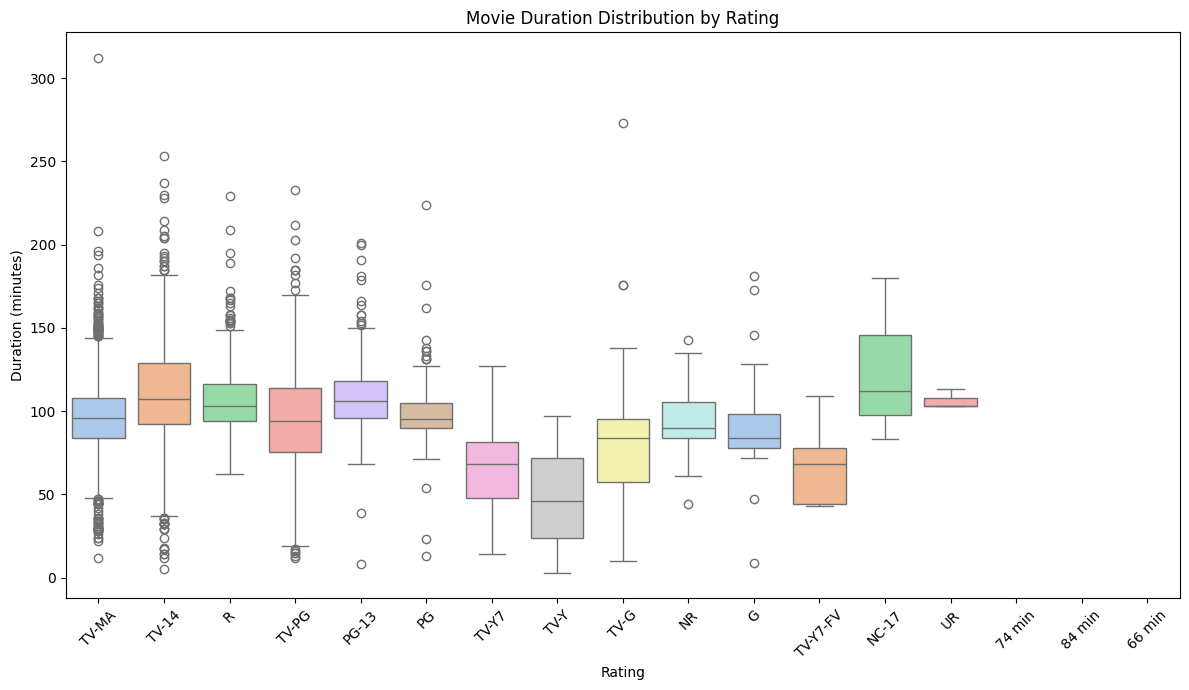

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame (or 'dataset' as per your notebook's variable name)

# Filter for Movies
movies_df = dataset[dataset['type'] == 'Movie'].copy()

# Extract the numerical duration for movies and convert to integer
# This handles cases like '90 min' -> 90
movies_df['duration_int'] = movies_df['duration'].str.replace(' min', '', regex=False).astype(float)

# --- Plotting the Relationship between Rating and Duration for Movies ---
plt.figure(figsize=(12, 7))
sns.boxplot(data=movies_df.dropna(subset=['duration_int', 'rating']),
            x='rating',
            y='duration_int',
            order=movies_df['rating'].value_counts().index,
            palette='pastel')
plt.title('Movie Duration Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#preprocessing
# Fill null values with blank strings in important columns
for col in ['director', 'cast', 'listed_in', 'description']:
    dataset[col] = dataset[col].fillna('')

# Combine important features into a single string
dataset['combined_features'] = dataset['title'] + ' ' + dataset['director'] + ' ' + dataset['cast'] + ' ' + dataset['listed_in'] + ' ' + dataset['description']

# Check the combined features
dataset['combined_features'].head()

0    Dick Johnson Is Dead Kirsten Johnson no Docume...
1    Blood & Water no Ama Qamata, Khosi Ngema, Gail...
2    Ganglands Julien Leclercq Sami Bouajila, Tracy...
3    Jailbirds New Orleans no no Docuseries, Realit...
4    Kota Factory no Mayur More, Jitendra Kumar, Ra...
Name: combined_features, dtype: object

In [18]:
#Text Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Apply vectorizer on combined features
tfidf_matrix = tfidf.fit_transform(dataset['combined_features'])

# Shape of matrix
print(tfidf_matrix.shape)

(8807, 52938)


In [19]:
#Calculate Similarity using Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [20]:
#Create Recommendation Function
# Reset index for easy mapping
dataset = dataset.reset_index()

# Create a mapping from title to index
title_to_index = pd.Series(dataset.index, index=dataset['title'].str.lower())

# Recommendation function
def recommend(title, num_recommendations=5):
    title = title.lower()
    if title not in title_to_index:
        return "Title not found in dataset."

    idx = title_to_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    
    recommended_indices = [i[0] for i in sim_scores]
    return dataset['title'].iloc[recommended_indices]

# Example: Recommend similar to "Breaking Bad"
recommend("Breaking Bad")

2931                   Better Call Saul
3428    El Camino: A Breaking Bad Movie
8505                           The Show
5885                     W/ Bob & David
355                  The Lincoln Lawyer
Name: title, dtype: object

In [21]:
#Add Popularity-Based Recommendations
# Most frequent titles by 'listed_in' (genre)
def top_titles_by_genre(genre, n=5):
    return dataset[dataset['listed_in'].str.contains(genre, case=False)]['title'].value_counts().head(n)

# Example
top_titles_by_genre("Action")


title
Ganglands                            1
Hera Pheri                           1
April and the Extraordinary World    1
Asura: The City of Madness           1
Avengers: Infinity War               1
Name: count, dtype: int64

In [ ]:
import ipywidgets as widgets
from IPython.display import display

text = widgets.Text(value='', placeholder='Enter title', description='Title:')
button = widgets.Button(description="Recommend")

output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        result = recommend(text.value)
        for r in result:
            print("🔹", r)

button.on_click(on_button_clicked)
display(text, button, output)

Text(value='', description='Title:', placeholder='Enter title')

Button(description='Recommend', style=ButtonStyle())

Output()